<a href="https://colab.research.google.com/github/Eternalstar69/-Book-Data-Analysis-from-Books-to-Scrape/blob/main/BooksToScrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [CPE312] Group Assignment
## การสกัดและวิเคราะห์ข้อมูลหนังสือจาก "Books to Scrape"
ร้านขายหนังสือออนไลน์สตาร์ทอัพต้องการเลือกสต็อกหนังสือที่มีแนวโน้มขายดีตามแนวโน้มของตลาดในปัจจุบัน เป้าหมายคือการเพิ่มผลตอบแทนจากการลงทุนเบื้องต้น โดยเน้นหนังสือที่ได้รับความนิยมและมีราคาแข่งขันได้
<p>วัตถุประสงค์:</p>

1. ให้นิสิตจับกลุ่ม กลุ่มละ3-4 คน
2. เพื่อค้นหาประเภทหนังสือที่ได้รับความนิยมมากที่สุดตามการจัดอันดับและบทวิจารณ์จากลูกค้า
3. เพื่อดู	แนวโน้มราคาของหนังสือในแต่ละประเภทและเปรียบเทียบกับราคาเฉลี่ยของตลา
4. เพื่อค้นหา.	รูปแารของหนังสือทมีความี่ต้องการสในท้องตลาด ูงเพื่อให้ร้านมีความเข้าตลาดสำหรับในการจัดสต็หนังสืออกใหม่ในคราวถัดไป



### กรอบประเด็นปัญหา

เพื่อตัดสินใจว่าควรสต็อกหนังสือหมวดใดบ้าง โดยบริษัทต้องการข้อมูลเชิงลึกเกี่ยวกับแนวโน้มราคาหนังสือปัจจุบัน ความชอบของลูกค้า และข้อเสนอที่แข่งขันกัน อย่างไรก็ตาม พวกเขาขาดข้อมูลที่จำเป็นในการตัดสินใจเหล่านี้

### Business Questions

1. ประเภทหนังสือใดมีการจัดอันดับเฉลี่ยและรีวิวจากลูกค้าสูงที่สุด? โดยข้อมูลนี้จะช่วยในการเข้าใจความชอบและความต้องการของลูกค้า
2. 	ราคาหนังสือแตกต่างกันอย่างไรในแต่ละประเภท และมีแนวโน้มราคาเป็นอย่างไรตามช่วงเวลา?โดย ข้อมูลนี้จำเป็นสำหรับการกำหนดกลยุทธ์การตั้งราคาที่แข่งขันได
3. •	หนังสือเล่มใดที่มักจะหมดสต็อกบ่อยครั้ง และสิ่งนี้บ่งบอกอะไรเกี่ยวกับความนิยมหรือปัญหาด้านอุปท (ความต้องการขายสินค้าของผู้ผลิต)าน? ข้อมูลเกี่ยวกับรูปแบบสต็อกสามารถช่วยในการจัดการสต็อกได้อย่างมีประสิทธิภาพ


## Example code to create csv file of all products

In [ ]:
# import web grabbing client and
# HTML parser
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

# variable to store website link as string
myurl = 'http://books.toscrape.com/index.html'

# grab website and store in variable uclient
uClient = uReq(myurl)

# read and close HTML
page_html = uClient.read()
uClient.close()

# call BeautifulSoup for parsing
page_soup = soup(page_html, "html.parser")

# grabs all the products under list tag
bookshelf = page_soup.findAll(
    "li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})

# create csv file of all products
filename = ("Books.csv")
f = open(filename, "w")

headers = "Book title, Price\n"
f.write(headers)

for books in bookshelf:

    # collect title of all books
    book_title = books.h3.a["title"]

    # collect book price of all books
    book_price = books.findAll("p", {"class": "price_color"})
    price = book_price[0].text.strip()

    print("Title of the book :" + book_title)
    print("Price of the book :" + price)

    f.write(book_title + "," + price+"\n")

f.close()

Title of the book :A Light in the Attic
Price of the book :£51.77
Title of the book :Tipping the Velvet
Price of the book :£53.74
Title of the book :Soumission
Price of the book :£50.10
Title of the book :Sharp Objects
Price of the book :£47.82
Title of the book :Sapiens: A Brief History of Humankind
Price of the book :£54.23
Title of the book :The Requiem Red
Price of the book :£22.65
Title of the book :The Dirty Little Secrets of Getting Your Dream Job
Price of the book :£33.34
Title of the book :The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price of the book :£17.93
Title of the book :The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price of the book :£22.60
Title of the book :The Black Maria
Price of the book :£52.15
Title of the book :Starving Hearts (Triangular Trade Trilogy, #1)
Price of the book :£13.99
Title of the book :Shakespeare's Sonnets
Price of the book :£20.66
Title of the book :Set

/tmp/ipython-input-2479347238.py:20: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  bookshelf = page_soup.findAll(
/tmp/ipython-input-2479347238.py:36: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  book_price = books.findAll("p", {"class": "price_color"})


## Example Code to Extract Categories

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://books.toscrape.com'
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

# Assuming categories are listed in a sidebar or specific section
category_container = soup.find('div', {'class': 'side_categories'})
categories = category_container.find_all('a')

for category in categories:
    category_name = category.get_text().strip()
    category_link = url + category['href']
    print(category_name, category_link)


Books https://books.toscrape.comcatalogue/category/books_1/index.html
Travel https://books.toscrape.comcatalogue/category/books/travel_2/index.html
Mystery https://books.toscrape.comcatalogue/category/books/mystery_3/index.html
Historical Fiction https://books.toscrape.comcatalogue/category/books/historical-fiction_4/index.html
Sequential Art https://books.toscrape.comcatalogue/category/books/sequential-art_5/index.html
Classics https://books.toscrape.comcatalogue/category/books/classics_6/index.html
Philosophy https://books.toscrape.comcatalogue/category/books/philosophy_7/index.html
Romance https://books.toscrape.comcatalogue/category/books/romance_8/index.html
Womens Fiction https://books.toscrape.comcatalogue/category/books/womens-fiction_9/index.html
Fiction https://books.toscrape.comcatalogue/category/books/fiction_10/index.html
Childrens https://books.toscrape.comcatalogue/category/books/childrens_11/index.html
Religion https://books.toscrape.comcatalogue/category/books/religion

## Example Code to Extract Links to Detail Pages

In [ ]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from urllib.parse import urljoin  # Import the urljoin function

# Correct the base URL to the root of the book listings
base_url = 'https://books.toscrape.com/catalogue/category/books_1/index.html'

# Open connection and grab the main page
uClient = uReq(base_url)
page_html = uClient.read()
uClient.close()

# HTML parsing
page_soup = soup(page_html, "html.parser")

# Find the correct link by inspecting where the relative links start
book_links = [urljoin(base_url, x.find('a')['href']) for x in page_soup.findAll("h3")]

# Print the correctly formed URLs
print("Extracted links:", book_links)


Extracted links: ['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html', 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html', 'https://books.toscrape.com/catalogue/soumission_998/index.html', 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html', 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html', 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html', 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html', 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html', 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html', 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html', 'https://books.toscrape.com/catalogue/starving-hearts-triangular-t

/tmp/ipython-input-2479019790.py:17: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  book_links = [urljoin(base_url, x.find('a')['href']) for x in page_soup.findAll("h3")]


## Example Code to Scrape Detailed Information from Each Book's Detail Page

In [ ]:
import pandas as pd

# Initialize DataFrame to store book data
books_df = pd.DataFrame(columns=["Title", "Product Type", "Price excl. tax", "Price incl. tax"])

# Loop through each collected book link to access detail pages
for link in book_links:
    print(link)
    uClient = uReq(link)
    detail_html = uClient.read()
    uClient.close()

    # HTML parsing for detail page
    detail_soup = soup(detail_html, "html.parser")

    # Extracting detailed product information
    title = detail_soup.h1.text
    product_info = {row.th.text: row.td.text for row in detail_soup.findAll("tr")}

    # Create a new DataFrame for the current book's data
    new_row = pd.DataFrame([{
        "Title": title,
        "Product Type": product_info.get("Product Type"),
        "Price excl. tax": product_info.get("Price (excl. tax)"),
        "Price incl. tax": product_info.get("Price (incl. tax)")

    }])

    # Append the new row to the DataFrame
    books_df = pd.concat([books_df, new_row], ignore_index=True)

print(books_df)


https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
https://books.toscrape.com/catalogue/soumission_998/index.html
https://books.toscrape.com/catalogue/sharp-objects_997/index.html
https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html
https://books.toscrape.com/catalogue/the-requiem-red_995/index.html
https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
https://books.toscrape.com/catalogue/the-black-maria_991/index.html


/tmp/ipython-input-3026143314.py:18: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  product_info = {row.th.text: row.td.text for row in detail_soup.findAll("tr")}


https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
https://books.toscrape.com/catalogue/shakespeares-sonnets_989/index.html
https://books.toscrape.com/catalogue/set-me-free_988/index.html
https://books.toscrape.com/catalogue/scott-pilgrims-precious-little-life-scott-pilgrim-1_987/index.html
https://books.toscrape.com/catalogue/rip-it-up-and-start-again_986/index.html
https://books.toscrape.com/catalogue/our-band-could-be-your-life-scenes-from-the-american-indie-underground-1981-1991_985/index.html
https://books.toscrape.com/catalogue/olio_984/index.html
https://books.toscrape.com/catalogue/mesaerion-the-best-science-fiction-stories-1800-1849_983/index.html
https://books.toscrape.com/catalogue/libertarianism-for-beginners_982/index.html
https://books.toscrape.com/catalogue/its-only-the-himalayas_981/index.html
                                                Title Product Type  \
0                                A Light in the Attic        Book

In [ ]:
books_df.head()

,Title,Product Type,Price excl. tax,Price incl. tax
0,A Light in the Attic,Books,£51.77,£51.77
1,Tipping the Velvet,Books,£53.74,£53.74
2,Soumission,Books,£50.10,£50.10
3,Sharp Objects,Books,£47.82,£47.82
4,Sapiens: A Brief History of Humankind,Books,£54.23,£54.23


##CREATE CSV TO STORE DATA FROM WEB SCRAPING

In [ ]:
# import web grabbing client and
# HTML parser
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

# variable to store website link as string
myurl = 'http://books.toscrape.com/index.html'

# grab website and store in variable uclient
uClient = uReq(myurl)

# read and close HTML
page_html = uClient.read()
uClient.close()

# call BeautifulSoup for parsing
page_soup = soup(page_html, "html.parser")

# grabs all the products under list tag
bookshelf = page_soup.findAll(
    "li", {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"})

# create csv file of all products
filename = ("Books.csv")
f = open(filename, "w")

headers = "Book title, Price\n"
f.write(headers)

for books in bookshelf:

    # collect title of all books
    book_title = books.h3.a["title"]

    # collect book price of all books
    book_price = books.findAll("p", {"class": "price_color"})
    price = book_price[0].text.strip()

    print("Title of the book :" + book_title)
    print("Price of the book :" + price)

    f.write(book_title + "," + price+"\n")

f.close()

Title of the book :A Light in the Attic
Price of the book :£51.77
Title of the book :Tipping the Velvet
Price of the book :£53.74
Title of the book :Soumission
Price of the book :£50.10
Title of the book :Sharp Objects
Price of the book :£47.82
Title of the book :Sapiens: A Brief History of Humankind
Price of the book :£54.23
Title of the book :The Requiem Red
Price of the book :£22.65
Title of the book :The Dirty Little Secrets of Getting Your Dream Job
Price of the book :£33.34
Title of the book :The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price of the book :£17.93
Title of the book :The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price of the book :£22.60
Title of the book :The Black Maria
Price of the book :£52.15
Title of the book :Starving Hearts (Triangular Trade Trilogy, #1)
Price of the book :£13.99
Title of the book :Shakespeare's Sonnets
Price of the book :£20.66
Title of the book :Set

/tmp/ipython-input-2479347238.py:20: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  bookshelf = page_soup.findAll(
/tmp/ipython-input-2479347238.py:36: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  book_price = books.findAll("p", {"class": "price_color"})


## Extract Categories

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://books.toscrape.com'
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

category_container = soup.find('div', {'class': 'side_categories'})
categories = category_container.find_all('a')

all_categories = []
for category in categories:
    category_name = category.get_text().strip()
    category_link = url + category['href']
    all_categories.append({'name': category_name, 'link': category_link})
    print(category_name, category_link)

Books https://books.toscrape.comcatalogue/category/books_1/index.html
Travel https://books.toscrape.comcatalogue/category/books/travel_2/index.html
Mystery https://books.toscrape.comcatalogue/category/books/mystery_3/index.html
Historical Fiction https://books.toscrape.comcatalogue/category/books/historical-fiction_4/index.html
Sequential Art https://books.toscrape.comcatalogue/category/books/sequential-art_5/index.html
Classics https://books.toscrape.comcatalogue/category/books/classics_6/index.html
Philosophy https://books.toscrape.comcatalogue/category/books/philosophy_7/index.html
Romance https://books.toscrape.comcatalogue/category/books/romance_8/index.html
Womens Fiction https://books.toscrape.comcatalogue/category/books/womens-fiction_9/index.html
Fiction https://books.toscrape.comcatalogue/category/books/fiction_10/index.html
Childrens https://books.toscrape.comcatalogue/category/books/childrens_11/index.html
Religion https://books.toscrape.comcatalogue/category/books/religion

## 1. ประเภทหนังสือใดมีการจัดอันดับเฉลี่ยและรีวิวจากลูกค้าสูงที่สุด? โดยข้อมูลนี้จะช่วยในการเข้าใจความชอบและความต้องการของลูกค้า


---



ประเภทหนังสือที่มีคะแนนเฉลี่ยสูงสุด:
Category
Erotica              5.000000
Adult Fiction        5.000000
Novels               5.000000
Christian Fiction    4.166667
Health               3.750000
Name: Rating, dtype: float64


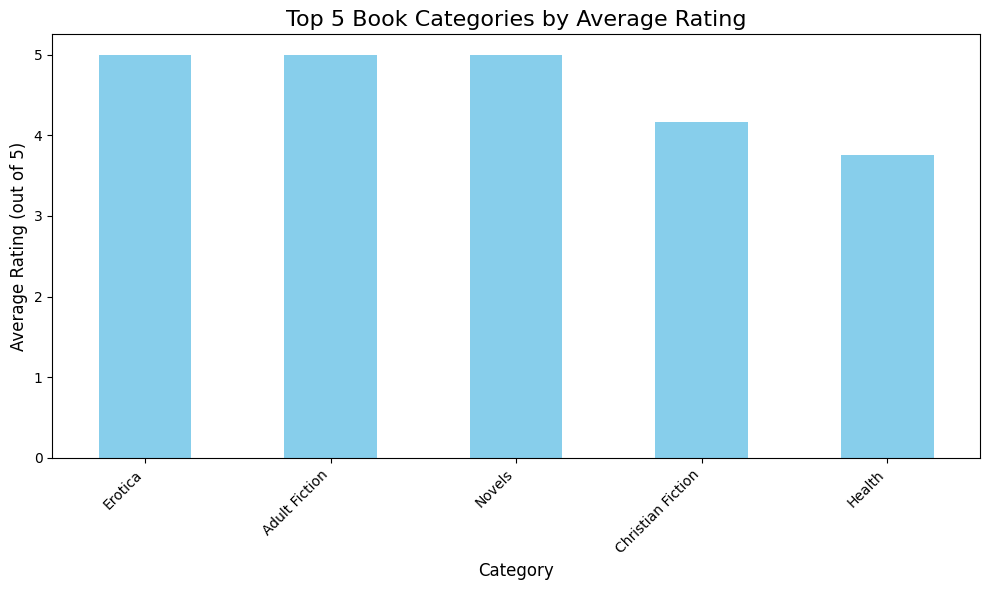

In [26]:
%matplotlib inline

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# ฟังก์ชันสำหรับแปลง Star Rating เป็นตัวเลข
def star_to_num(star_rating):
    return {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}.get(star_rating, 0)

def get_category_ratings_with_visuals():
    """
    สกัดและวิเคราะห์คะแนนเฉลี่ยของแต่ละประเภทหนังสือ พร้อมแสดงผลด้วยกราฟ
    """
    base_url = 'http://books.toscrape.com/'
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    category_container = soup.find('div', class_='side_categories')
    categories = category_container.find_all('a')

    all_books_data = []

    # Loop เพื่อสกัดข้อมูลคะแนนของหนังสือทุกประเภท
    for cat in categories:
        if cat.text.strip() == 'Books':
            continue
        category_name = cat.text.strip()
        category_url = base_url + cat['href']

        page_response = requests.get(category_url)
        page_soup = BeautifulSoup(page_response.content, 'html.parser')

        books = page_soup.find_all('article', class_='product_pod')

        for book in books:
            try:
                rating_class = book.find('p', class_='star-rating')['class'][1]
                all_books_data.append({
                    'Category': category_name,
                    'Rating': star_to_num(rating_class)
                })
            except (AttributeError, IndexError):
                # จัดการข้อผิดพลาดหากไม่พบข้อมูล rating
                continue

    df = pd.DataFrame(all_books_data)

    # คำนวณค่าเฉลี่ยและเลือก 5 อันดับแรก
    top_categories = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

    print("ประเภทหนังสือที่มีคะแนนเฉลี่ยสูงสุด:")
    print(top_categories)

    # สร้างกราฟแท่ง
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar', color='skyblue')

    plt.title('Top 5 Book Categories by Average Rating', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Average Rating (out of 5)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # แสดงกราฟ
    plt.show()

# เรียกใช้ฟังก์ชัน
get_category_ratings_with_visuals()

## 2. ราคาหนังสือแตกต่างกันอย่างไรในแต่ละประเภท และมีแนวโน้มราคาเป็นอย่างไรตามช่วงเวลา?โดย ข้อมูลนี้จำเป็นสำหรับการกำหนดกลยุทธ์การตั้งราคาที่แข่งขันได้
---

ราคาเฉลี่ยของหนังสือในแต่ละประเภท (10 อันดับแรก):
Category
Suspense            58.330000
Novels              54.810000
Politics            53.613333
Health              51.452500
New Adult           46.383333
Christian           42.496667
Sports and Games    41.166000
Self Help           40.620000
Travel              39.794545
Fantasy             39.654000
Name: Price, dtype: float64


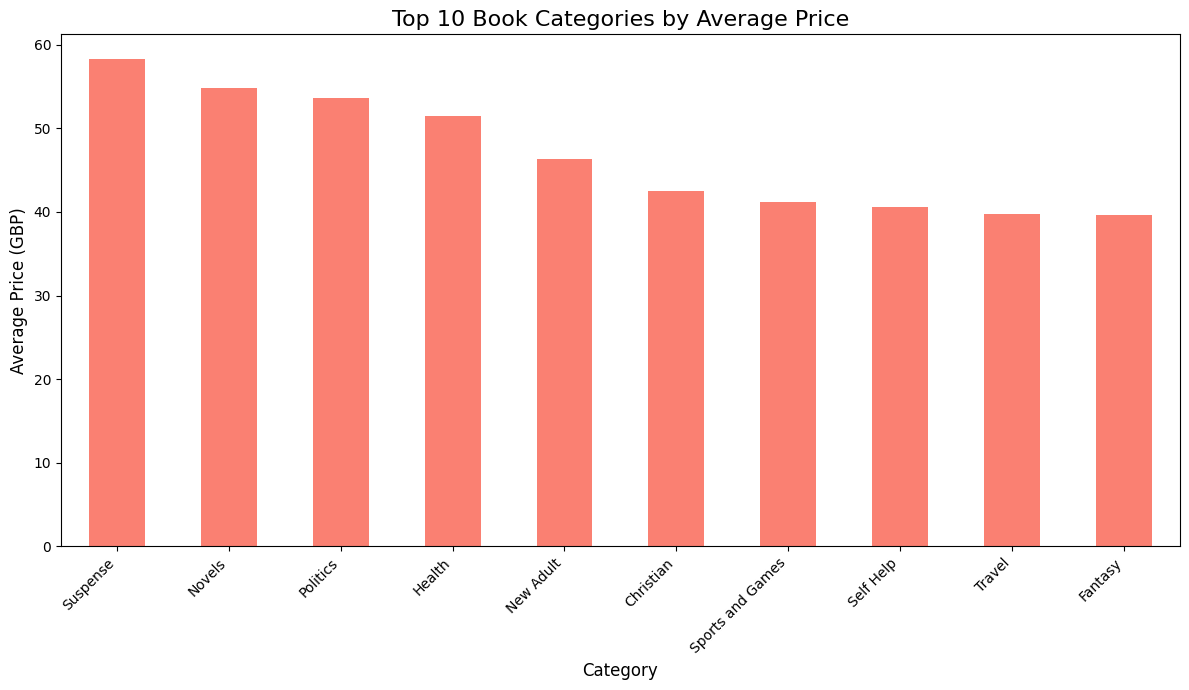

In [27]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

def get_category_prices_and_visuals():
    """สกัดและวิเคราะห์ราคาเฉลี่ยของแต่ละประเภทหนังสือ พร้อมแสดงผลด้วยกราฟ"""
    base_url = 'http://books.toscrape.com/'
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    category_container = soup.find('div', class_='side_categories')
    categories = category_container.find_all('a')

    all_books_data = []

    # Loop สกัดข้อมูลทุกประเภทหนังสือ
    for cat in categories:
        if cat.text.strip() == 'Books':
            continue
        category_name = cat.text.strip()
        category_url = base_url + cat['href']

        page_response = requests.get(category_url)
        page_soup = BeautifulSoup(page_response.content, 'html.parser')

        books = page_soup.find_all('article', class_='product_pod')

        for book in books:
            try:
                price = book.find('p', class_='price_color').text.strip()
                # แปลงราคาให้เป็น float
                price_value = float(re.search(r'[\d.]+', price).group())
                all_books_data.append({
                    'Category': category_name,
                    'Price': price_value
                })
            except (AttributeError, TypeError):
                # จัดการข้อผิดพลาดหากไม่พบข้อมูลราคา
                continue

    df = pd.DataFrame(all_books_data)

    # คำนวณราคาเฉลี่ยในแต่ละประเภท
    average_prices = df.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)

    print("ราคาเฉลี่ยของหนังสือในแต่ละประเภท (10 อันดับแรก):")
    print(average_prices)

    # สร้างกราฟแท่ง
    plt.figure(figsize=(12, 7))
    average_prices.plot(kind='bar', color='salmon')

    plt.title('Top 10 Book Categories by Average Price', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Average Price (GBP)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# เรียกใช้ฟังก์ชัน
get_category_prices_and_visuals()

## หนังสือเล่มใดที่มักจะหมดสต็อกบ่อยครั้ง?  **มันไม่มีเล่มไหน out of stock**
---

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_out_of_stock_books():
    """สกัดและระบุหนังสือที่หมดสต็อก"""
    base_url = 'http://books.toscrape.com/'
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    category_container = soup.find('div', class_='side_categories')
    categories = category_container.find_all('a')

    out_of_stock_data = []

    # Loop สกัดข้อมูลทุกประเภทหนังสือ
    for cat in categories:
        if cat.text.strip() == 'Books':
            continue
        category_name = cat.text.strip()
        category_url = base_url + cat['href']

        page_response = requests.get(category_url)
        page_soup = BeautifulSoup(page_response.content, 'html.parser')

        books = page_soup.find_all('article', class_='product_pod')

        for book in books:
            title = book.h3.a['title']
            stock_status = book.find('p', class_='instock availability').text.strip()

            if stock_status == 'In stock':
                out_of_stock_data.append({
                    'Title': title,
                    'Category': category_name,
                    'Stock Status': stock_status
                })

    df = pd.DataFrame(out_of_stock_data)

    # นับจำนวนหนังสือที่หมดสต็อกในแต่ละประเภท
    out_of_stock_counts = df[df['Stock Status'] != 'In stock'].groupby('Category').size().sort_values(ascending=False).head(5)
    print("ประเภทหนังสือที่มีจำนวนหนังสือหมดสต็อกสูงสุด:")
    print(out_of_stock_counts)

# เรียกใช้ฟังก์ชัน
get_out_of_stock_books()

ประเภทหนังสือที่มีจำนวนหนังสือหมดสต็อกสูงสุด:
Series([], dtype: int64)


## จึงพิจารณาจากหนังสือที่เหลือใน stock น้อยที่สุดแทน  **พบว่า มี instock 1 ชิ้นมี 98 เล่ม**

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from concurrent.futures import ThreadPoolExecutor

def get_stock_count(book_url):
    """
    ฟังก์ชันย่อยสำหรับสกัดจำนวนสต็อกของหนังสือจาก URL
    """
    try:
        book_page_response = requests.get(book_url)
        book_page_soup = BeautifulSoup(book_page_response.content, 'html.parser')

        title = book_page_soup.find('div', class_='product_main').h1.text
        stock_info = book_page_soup.find('p', class_='instock availability').text.strip()

        match = re.search(r'\((\d+)', stock_info)
        if match:
            stock_count = int(match.group(1))
            return {'Title': title, 'Stock Count': stock_count}
    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการสกัดข้อมูลจาก {book_url}: {e}")
        return None
    return None

def get_low_stock_books_faster():
    """
    สกัดข้อมูลจำนวนสต็อกคงเหลือแบบเจาะลึกโดยใช้ Multithreading เพื่อเพิ่มความเร็ว
    """
    base_url = 'http://books.toscrape.com/'
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    category_container = soup.find('div', class_='side_categories')
    categories = category_container.find_all('a')

    book_links = []

    # ส่วนที่ 1: สกัด URL ของหนังสือทั้งหมด (ยังคงวนลูปแบบปกติ)
    for cat in categories:
        if cat.text.strip() == 'Books':
            continue
        category_url = base_url + cat['href']

        while True:
            page_response = requests.get(category_url)
            page_soup = BeautifulSoup(page_response.content, 'html.parser')
            books_on_page = page_soup.find_all('article', class_='product_pod')

            for book in books_on_page:
                book_link = base_url + 'catalogue/' + book.h3.a['href'].replace('../', '')
                book_links.append(book_link)

            next_page = page_soup.find('li', class_='next')
            if next_page:
                next_url = next_page.a['href']
                category_url = '/'.join(category_url.split('/')[:-1]) + '/' + next_url
            else:
                break

    print(f" สกัด URL ของหนังสือได้ทั้งหมด {len(book_links)} เล่ม")

    low_stock_data = []

    # ส่วนที่ 2: วนลูปเข้า URL ของหนังสือแต่ละเล่มแบบขนาน (Parallel)
    # จำนวน max_workers คือจำนวน thread ที่จะทำงานพร้อมกัน สามารถปรับเพิ่ม-ลดได้
    with ThreadPoolExecutor(max_workers=20) as executor:
        results = executor.map(get_stock_count, book_links)
        low_stock_data = [result for result in results if result is not None]

    # ส่วนที่ 3: วิเคราะห์ข้อมูลที่สกัดได้
    if low_stock_data:
        df = pd.DataFrame(low_stock_data)
        low_stock_books = df.sort_values(by='Stock Count', ascending=True).head(100)

        print("\n\n หนังสือที่มีปริมาณคงเหลือในสต็อกน้อยที่สุด (1 เล่ม):")
        print(low_stock_books)
    else:
        print("\n\nไม่สามารถสกัดข้อมูลจำนวนสต็อกได้")

# เรียกใช้ฟังก์ชัน
get_low_stock_books_faster()

 สกัด URL ของหนังสือได้ทั้งหมด 1000 เล่ม


 หนังสือที่มีปริมาณคงเหลือในสต็อกน้อยที่สุด (1 เล่ม):
                                                 Title  Stock Count
41                Blood Defense (Samantha Brinkman #1)            1
40           The Girl In The Ice (DCI Erika Foster #1)            1
39                                   The Girl You Lost            1
38   The No. 1 Ladies' Detective Agency (No. 1 Ladi...            1
10                  1,000 Places to See Before You Die            1
..                                                 ...          ...
161                                               Emma            1
42                 1st to Die (Women's Murder Club #1)            1
621           Settling the Score (The Summer Games #1)            1
285                                 The Course of Love            2
430      The Suffragettes (Little Black Classics, #96)            2

[100 rows x 2 columns]


## วิเคราะห์ตามหมวดหมู่จาก คะแนนรีวิว 5 ดาว + Instock >= 1 เล่ม
---

Total books found: 1000


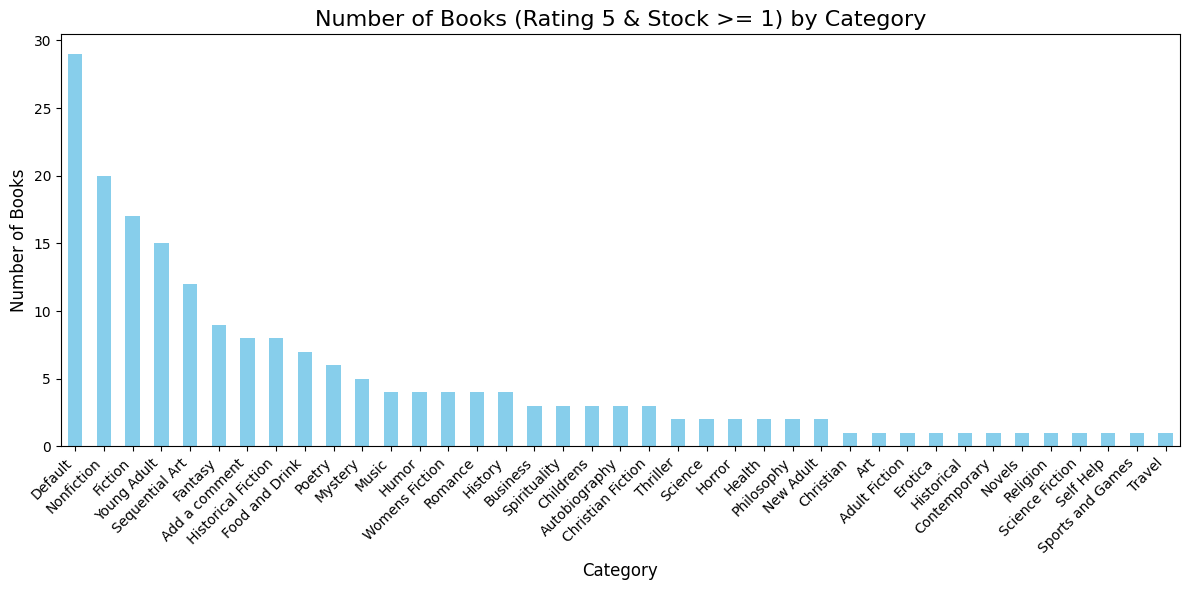

In [47]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

def star_to_num(star_rating):
    return {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}.get(star_rating, 0)

def scrape_book_details(book_url, category_name):
    try:
        resp = requests.get(book_url)
        soup = BeautifulSoup(resp.content, 'html.parser')
        product_main = soup.find('div', class_='product_main')
        if not product_main:
            return None
        title = product_main.find('h1').text
        stock_info = product_main.find('p', class_='instock availability').text.strip()
        rating_class = product_main.find('p', class_='star-rating')['class'][1]
        match = re.search(r'\((\d+)', stock_info)
        stock_count = int(match.group(1)) if match else None
        return {
            'Title': title,
            'Category': category_name,  # English category
            'Rating': star_to_num(rating_class),
            'Stock Count': stock_count
        }
    except:
        return None

def get_all_books():
    base_url = 'http://books.toscrape.com/'
    resp = requests.get(base_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    category_container = soup.find('div', class_='side_categories')
    categories = category_container.find_all('a')

    book_links = []
    for cat in categories:
        if cat.text.strip() == 'Books':
            continue
        category_name = cat.text.strip()  # English name
        category_url = base_url + cat['href']
        while True:
            page_resp = requests.get(category_url)
            page_soup = BeautifulSoup(page_resp.content, 'html.parser')
            books_on_page = page_soup.find_all('article', class_='product_pod')
            for book in books_on_page:
                book_link = base_url + 'catalogue/' + book.h3.a['href'].replace('../', '')
                book_links.append((book_link, category_name))
            next_page = page_soup.find('li', class_='next')
            if next_page:
                next_url = next_page.a['href']
                category_url = '/'.join(category_url.split('/')[:-1]) + '/' + next_url
            else:
                break
    return book_links

def analyze_and_plot():
    book_links = get_all_books()
    print(f"Total books found: {len(book_links)}")

    all_books_data = []
    with ThreadPoolExecutor(max_workers=30) as executor:
        results = executor.map(lambda x: scrape_book_details(x[0], x[1]), book_links)
        all_books_data = [r for r in results if r is not None]

    df = pd.DataFrame(all_books_data).drop_duplicates(subset=['Title'])

    # Filter: Rating 5 and Stock >= 1
    high_demand = df[(df['Rating'] == 5) & (df['Stock Count'] >= 1)]

    # Count per Category
    category_counts = high_demand.groupby('Category').size().sort_values(ascending=False)

    # Plot Bar chart (English labels)
    plt.figure(figsize=(12,6))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Books (Rating 5 & Stock >= 1) by Category', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Number of Books', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Run
analyze_and_plot()


## วิเคราะห์ Price sensitivity

Total books found: 1000


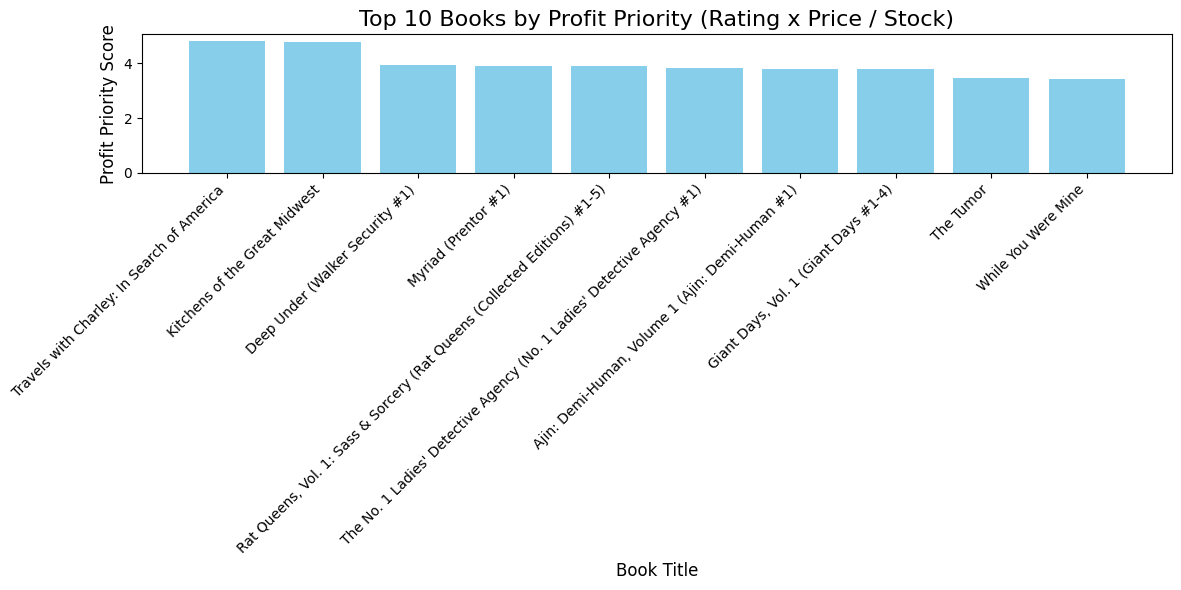

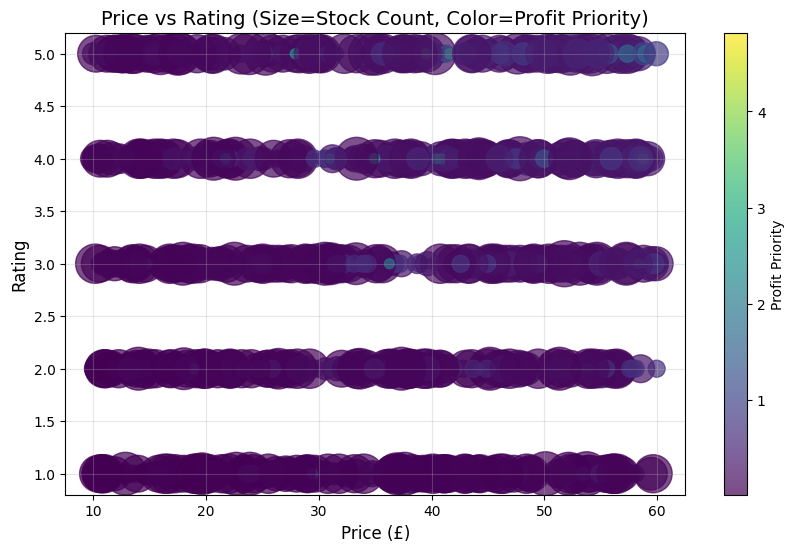

In [50]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

# ----------------------------
# ฟังก์ชันช่วย
# ----------------------------
def star_to_num(star_rating):
    return {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}.get(star_rating, 0)

def scrape_book_details(book_url, category_name):
    try:
        resp = requests.get(book_url)
        soup = BeautifulSoup(resp.content, 'html.parser')
        product_main = soup.find('div', class_='product_main')
        if not product_main:
            return None
        title = product_main.find('h1').text
        stock_info = product_main.find('p', class_='instock availability').text.strip()
        rating_class = product_main.find('p', class_='star-rating')['class'][1]
        price_text = product_main.find('p', class_='price_color').text.strip()
        price = float(price_text.replace('£','').replace('Â',''))
        match = re.search(r'\((\d+)', stock_info)
        stock_count = int(match.group(1)) if match else 1  # default 1 if missing
        return {
            'Title': title,
            'Category': category_name,
            'Rating': star_to_num(rating_class),
            'Stock Count': stock_count,
            'Price': price
        }
    except:
        return None

def get_all_books():
    base_url = 'http://books.toscrape.com/'
    resp = requests.get(base_url)
    soup = BeautifulSoup(resp.content, 'html.parser')
    category_container = soup.find('div', class_='side_categories')
    categories = category_container.find_all('a')

    book_links = []
    for cat in categories:
        if cat.text.strip() == 'Books':
            continue
        category_name = cat.text.strip()
        category_url = base_url + cat['href']
        while True:
            page_resp = requests.get(category_url)
            page_soup = BeautifulSoup(page_resp.content, 'html.parser')
            books_on_page = page_soup.find_all('article', class_='product_pod')
            for book in books_on_page:
                book_link = base_url + 'catalogue/' + book.h3.a['href'].replace('../', '')
                book_links.append((book_link, category_name))
            next_page = page_soup.find('li', class_='next')
            if next_page:
                next_url = next_page.a['href']
                category_url = '/'.join(category_url.split('/')[:-1]) + '/' + next_url
            else:
                break
    return book_links

# ----------------------------
# 1. Scrape ข้อมูลจริง
# ----------------------------
book_links = get_all_books()
print(f"Total books found: {len(book_links)}")

all_books_data = []
with ThreadPoolExecutor(max_workers=30) as executor:
    results = executor.map(lambda x: scrape_book_details(x[0], x[1]), book_links)
    all_books_data = [r for r in results if r is not None]

df = pd.DataFrame(all_books_data).drop_duplicates(subset=['Title'])

# ----------------------------
# 2. สร้าง Composite Score: Profit Priority
# ----------------------------
df['Price_norm'] = df['Price'] / df['Price'].max()
df['Profit_Priority'] = df['Rating'] * df['Price_norm'] / df['Stock Count']

# ----------------------------
# 3. Bar Chart: Top 10 books by Profit Priority
# ----------------------------
top_books = df.sort_values(by='Profit_Priority', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_books['Title'], top_books['Profit_Priority'], color='skyblue')
plt.title('Top 10 Books by Profit Priority (Rating x Price / Stock)', fontsize=16)
plt.xlabel('Book Title', fontsize=12)
plt.ylabel('Profit Priority Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Scatter Plot: Price vs Rating, size = Stock Count
# ----------------------------
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df['Price'], df['Rating'],
    s=df['Stock Count']*50,  # size of point proportional to stock
    c=df['Profit_Priority'],  # color represents priority
    cmap='viridis', alpha=0.7
)
plt.colorbar(scatter, label='Profit Priority')
plt.title('Price vs Rating (Size=Stock Count, Color=Profit Priority)', fontsize=14)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()
